In [7]:
import pandas as pd 

df = pd.read_csv('housepricedata.csv')

df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [8]:
dataset = df.values

In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [10]:
X=dataset[:,0:10]

In [11]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [12]:
Y = dataset[:,10]

In [13]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [18]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, Y, test_size=0.3)

In [21]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential([
   Dense(32, activation='relu', input_shape=(10,)),
   Dense(32, activation='relu'),
   Dense(1, activation='sigmoid'),
])

In [28]:
model.compile(optimizer='sgd',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [29]:
hist = model.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 23ms/step - loss: 0.6976 - accuracy: 0.4932 - val_loss: 0.6978 - val_accuracy: 0.4612
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.4932 - val_loss: 0.6925 - val_accuracy: 0.4612
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6866 - accuracy: 0.4932 - val_loss: 0.6877 - val_accuracy: 0.4612
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.4980 - val_loss: 0.6830 - val_accuracy: 0.4658
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.5000 - val_loss: 0.6783 - val_accuracy: 0.4703
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6714 - accuracy: 0.5078 - val_loss: 0.6733 - val_accuracy: 0.5023
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6660 - accuracy: 0.5342 - val_loss: 0.6683 - val_accuracy: 0.5616
Epoch 8/100


In [30]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8950


[0.2731989622116089, 0.8949771523475647]

In [32]:
import matplotlib.pyplot as plt

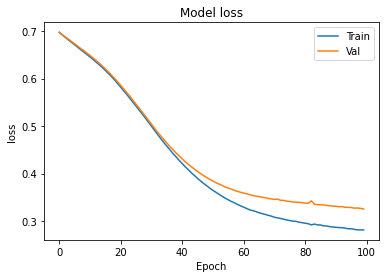

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

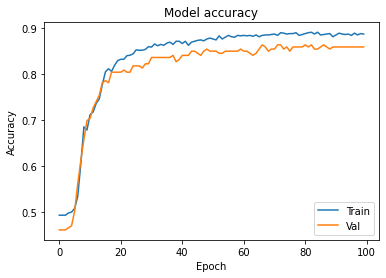

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [55]:
model_2=Sequential([
   Dense(1000, activation='relu', input_shape=(10,)),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1000, activation='relu'),
   Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', 
               loss='binary_crossentropy',
               metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
         batch_size=32, epochs=100,
         validation_data=(X_val, Y_val))
            

Epoch 1/100
32/32 [==============================] - 7s 75ms/step - loss: 0.4877 - accuracy: 0.7769 - val_loss: 0.3972 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 2s 55ms/step - loss: 0.3508 - accuracy: 0.8601 - val_loss: 0.3621 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 2s 51ms/step - loss: 0.3258 - accuracy: 0.8748 - val_loss: 0.3197 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 58ms/step - loss: 0.3293 - accuracy: 0.8787 - val_loss: 0.3191 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 55ms/step - loss: 0.2637 - accuracy: 0.8894 - val_loss: 0.3071 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2527 - accuracy: 0.8973 - val_loss: 0.3568 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2723 - accuracy: 0.8855 - val_loss: 0.2779 - val_accuracy: 0.8767
Epoch 

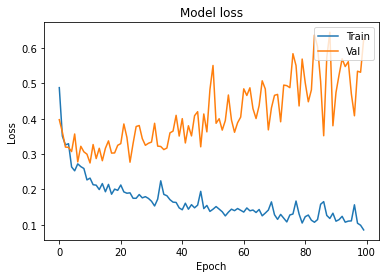

In [57]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

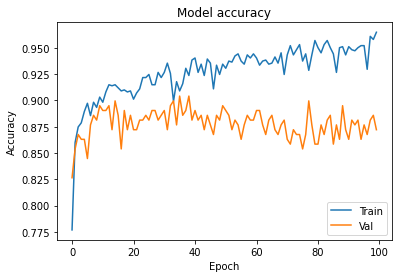

In [59]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()